# Batch Lever Press Analysis

### Notebook for processing and analyzing lever press behavior
Allows for processing, summarizing, and analysis of lever behavior across all sessions, and across multiple mice. Includes sections for data visualization 

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.mouse_lever_behavior import analyze_mouse_lever_behavior
from Lab_Analyses.Behavior.group_lever_press import Group_Lever_Press
from Lab_Analyses.Behavior import behavior_plotting as bplot
from Lab_Analyses.Utilities.save_load_pickle import save_pickle, load_pickle

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Across Day Batch Processing and Summarizing
Sections below are for analyzing all sessions across all days of a standard lever press training regime. 


### Specify the data to be analyzed
#### Paths
Specify the paths where data files are located

In [2]:
# Parent path leading to where raw dispatcher and xsglog files are loacted
raw_path = r'Z:\People\Jake\Behavior'
#raw_path = r"C:\Users\Jake\Desktop\temp_behavior"
# Parent path leading to where analyzed data are saved
save_path = r'G:\Analyzed_data\individual'

### Datasets
Specify what data to be processed and analyzed as well as other parameters associated with the data

In [158]:
# EGFP Datasets
## Mouse IDs
#gfp_3 = "JW173" # From old imaging experiment
#gfp_4 = "JW174" # from old imaging experiment
gfp_5 = "JW234"
gfp_6 = "JW239"
gfp_7 = "JW245"
gfp_8 = "JW246"
#gfp_9 = "JW247" # Not using due to missing data
gfp_10 = "JW248"
gfp_11 = "BM102" 
gfp_12 = "BM106"
gfp_13 = "JW301"
# gfp_14 = "JW302" # Not using no expression
#gfp_15 = "JW326" # Poor viral expression
gfp_16 = "JW344"
#gfp_17 = "JW355" # Not using due to bad virus localization
#gfp_18 = "JW357" # Not using due to poor expression
#gfp_19 = "JW362" # Very little viral expression
gfp_20 = "JW369"
#gfp_21 = "JW370" # Note using due to poor expression

## Reanalyze ?
# Indicate if you are reanalyzing the data
# Will re-process, summarize, and analyze data even if already analyzed before
g_reanalyze = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,True, True]
g_reanalyze = [not x for x in g_reanalyze]

## Ignore days ?
# Indicate if there are any days for each mouse you wish to ignore for analysis
# For example you did another session unrelated to this task (e.g. opto)
g_ignore_3 = ()
g_ignore_4 = ()
g_ignore_5 = ()
g_ignore_6 = ()
g_ignore_7 = ()
g_ignore_8 = ()
g_ignore_9 = ()
g_ignore_10 = ()
g_ignore_11 = ()
g_ignore_12 = ()
g_ignore_13 = ()
g_ignore_14 = ()
g_ignore_15 = ()
g_ignore_16 = ()
g_ignore_17 = ()
g_ignore_18 = ()
g_ignore_19 = ()
g_ignore_20 = ()
g_ignore_21 = ()

# Imaged Sessions
## Indicate which sessions were imaged

#### Number of sessiosn
num_of_sessions = 14
#### Put which sessions were imaged in the lists (must be int)
im_3 = []
im_4 = []
im_5 = []
im_6 = []
im_7 = []
im_8 = []
im_9 = []
im_10 = []
im_11 = []
im_12 = []
im_13 = []
im_14 = []
im_15 = []
im_16 = []
im_17 = []
im_18 = []
im_19 = []
im_20 = []
im_21 = []
#### Do not change this part
g_image_3 = [False if x not in np.array(im_3)-1 else True for x in range(num_of_sessions)]
g_image_4 = [False if x not in np.array(im_4)-1 else True for x in range(num_of_sessions)]
g_image_5 = [False if x not in np.array(im_5)-1 else True for x in range(num_of_sessions)]
g_image_6 = [False if x not in np.array(im_6)-1 else True for x in range(num_of_sessions)]
g_image_7 = [False if x not in np.array(im_7)-1 else True for x in range(num_of_sessions)]
g_image_8 = [False if x not in np.array(im_8)-1 else True for x in range(num_of_sessions)]
g_image_9 = [False if x not in np.array(im_9)-1 else True for x in range(num_of_sessions)]
g_image_10 = [False if x not in np.array(im_10)-1 else True for x in range(num_of_sessions)]
g_image_11 = [False if x not in np.array(im_11)-1 else True for x in range(num_of_sessions)]
g_image_12 = [False if x not in np.array(im_12)-1 else True for x in range(num_of_sessions)]
g_image_13 = [False if x not in np.array(im_13)-1 else True for x in range(num_of_sessions)]
g_image_14 = [False if x not in np.array(im_14)-1 else True for x in range(num_of_sessions)]
g_image_15 = [False if x not in np.array(im_12)-1 else True for x in range(num_of_sessions)]
g_image_16 = [False if x not in np.array(im_13)-1 else True for x in range(num_of_sessions)]
g_image_17 = [False if x not in np.array(im_14)-1 else True for x in range(num_of_sessions)]
g_image_18 = [False if x not in np.array(im_18)-1 else True for x in range(num_of_sessions)]
g_image_19 = [False if x not in np.array(im_19)-1 else True for x in range(num_of_sessions)]
g_image_20 = [False if x not in np.array(im_20)-1 else True for x in range(num_of_sessions)]
g_image_21 = [False if x not in np.array(im_21)-1 else True for x in range(num_of_sessions)]

# Give info about the experiment for each mouse
## Optional. Set to none below if not being used
g_exp_3 = "paAIP2 Behavior"
g_exp_4 = "paAIP2 Behavior"
g_exp_5 = "paAIP2 Behavior"
g_exp_6 = "paAIP2 Behaivor"
g_exp_7 = "paAIP2 Behaivor"
g_exp_8 = "paAIP2 Behaivor"
g_exp_9 = "paAIP2 Behaivor"
g_exp_10 = "paAIP2 Behaivor"
g_exp_11 = "paAIP2 Behavior"
g_exp_12 = "paAIP2 Behavior"
g_exp_13 = "paAIP2 Behavior"
g_exp_14 = "paAIP2 Behavior"
g_exp_15 = "paAIP2 Behavior"
g_exp_16 = "paAIP2 Behavior"
g_exp_17 = "paAIP2 Behavior"
g_exp_18 = "paAIP2 Behavior"
g_exp_19 = "paAIP2 Behavior"
g_exp_20 = "paAIP2 Behavior"
g_exp_21 = "paAIP2 Behavior"

#gfp_ids = [gfp_3, gfp_4, gfp_5, gfp_6, gfp_7, gfp_8, gfp_10, gfp_11, gfp_12, gfp_13, gfp_15, gfp_16, gfp_19, gfp_20]
gfp_imaged = [g_image_3, g_image_4, g_image_5, g_image_6, g_image_7, g_image_8, g_image_9, g_image_10, g_image_11, g_image_12, g_image_13, g_image_15, g_image_16, g_image_17, g_image_18, g_image_19, g_image_20, g_image_21]
gfp_ignore = [g_ignore_3, g_ignore_4, g_ignore_5, g_ignore_6, g_ignore_7, g_ignore_8, g_ignore_9, g_ignore_10, g_ignore_11, g_ignore_12, g_ignore_13, g_ignore_15, g_ignore_16, g_ignore_17, g_ignore_18, g_ignore_19, g_ignore_20, g_ignore_21]
gfp_exps = [g_exp_3, g_exp_4, g_exp_5, g_exp_6, g_exp_7, g_exp_8, g_exp_9, g_exp_10, g_exp_11, g_exp_12, g_exp_13, g_exp_15, g_exp_16, g_exp_17, g_exp_18, g_exp_19, g_exp_20, g_exp_21]

gfp_ids = [gfp_5, gfp_6, gfp_7, gfp_8, gfp_10, gfp_11, gfp_12, gfp_13, gfp_16, gfp_20]


In [159]:
# paAIP2 Datasets
## Mouse IDs
pa_1 = "JW216"
pa_2 = "JW229"
pa_3 = "JW230"
pa_4 = "BM076"
pa_5 = "JW284"
pa_6 = "JW298"
# pa_7 = "JW307" # Not using, no expression
# pa_8 = "JW308" # Not using no histology
pa_9 = "JW384" #
pa_10 = "JW385" #
pa_11 = "JW386" #


## Reanalyze ?
# Indicate if you are reanalyzing the data
# Will re-process, summarize, and analyze data even if already analyzed before
p_reanalyze = [True, True, True, True, True, True, True, True, True, True, True]
p_reanalyze = [not x for x in p_reanalyze]

## Ignore days ?
# Indicate if there are any days for each mouse you wish to ignore for analysis
# For example you did another session unrelated to this task (e.g. opto)
p_ignore_1 = ()
p_ignore_2 = ()
p_ignore_3 = ()
p_ignore_4 = ()
p_ignore_5 = ()
p_ignore_6 = ()
p_ignore_7 = ()
p_ignore_8 = ()
p_ignore_9 = ()
p_ignore_10 = ()
p_ignore_11 = ()


# Imaged Sessions
## Indicate which sessions were imaged

#### Number of sessiosn
num_of_sessions = 14
#### Put which sessions were imaged in the lists (must be int)
im_1 = []
im_2 = []
im_3 = []
im_4 = []
im_5 = []
im_6 = []
im_7 = []
im_8 = []
im_9 = []
im_10 = []
im_11 = []

#### Do not change this part
p_image_1 = [False if x not in np.array(im_1)-1 else True for x in range(num_of_sessions)]
p_image_2 = [False if x not in np.array(im_2)-1 else True for x in range(num_of_sessions)]
p_image_3 = [False if x not in np.array(im_3)-1 else True for x in range(num_of_sessions)]
p_image_4 = [False if x not in np.array(im_4)-1 else True for x in range(num_of_sessions)]
p_image_5 = [False if x not in np.array(im_5)-1 else True for x in range(num_of_sessions)]
p_image_6 = [False if x not in np.array(im_6)-1 else True for x in range(num_of_sessions)]
p_image_7 = [False if x not in np.array(im_7)-1 else True for x in range(num_of_sessions)]
p_image_8 = [False if x not in np.array(im_8)-1 else True for x in range(num_of_sessions)]
p_image_9 = [False if x not in np.array(im_9)-1 else True for x in range(num_of_sessions)]
p_image_10 = [False if x not in np.array(im_10)-1 else True for x in range(num_of_sessions)]
p_image_11 = [False if x not in np.array(im_11)-1 else True for x in range(num_of_sessions)]


# Give info about the experiment for each mouse
## Optional. Set to none below if not being used
p_exp_1 = "paAIP2 Behavior"
p_exp_2 = "paAIP2 Behavior"
p_exp_3 = "paAIP2 Behavior"
p_exp_4 = "paAIP2 Behavior"
p_exp_5 = "paAIP2 Behavior"
p_exp_6 = "paAIP2 Behavior"
p_exp_7 = "paAIP2 Behavior"
p_exp_8 = "paAIP2 Behavior"
p_exp_9 = "paAIP2 Behavior"
p_exp_10 = "paAIP2 Behavior"
p_exp_11 = "paAIP2 Behavior"


pa_ids = [pa_1, pa_2, pa_3, pa_4, pa_5, pa_6]
pa_imaged = [p_image_1, p_image_2, p_image_3, p_image_4, p_image_5, p_image_6, p_image_9, p_image_10, p_image_11]
pa_ignore = [p_ignore_1, p_ignore_2, p_ignore_3, p_ignore_4, p_ignore_5, p_ignore_6, p_ignore_9, p_ignore_10, p_ignore_11]
pa_exps = [p_exp_1, p_exp_2, p_exp_3, p_exp_4, p_exp_5, p_exp_6, p_exp_9, p_exp_10, p_exp_11]


### Process and Summarize each dataset

In [160]:
# EGFP
gfp_summed_data = []
for gfp_id, gfp_img, gfp_exp, gfp_reanaly, gfp_ig in zip(gfp_ids, gfp_imaged, gfp_exps, g_reanalyze, gfp_ignore):
    print(gfp_id)
    path = os.path.join(raw_path, gfp_id)
    sd = analyze_mouse_lever_behavior(
        mouse_id=gfp_id, path=path, imaged=gfp_img, save=True, save_suffix=None, reanalyze=gfp_reanaly, 
        ignore_dir=gfp_ig, press_len=0.5
    )
    gfp_summed_data.append(sd)

JW234
----------------------------
Analyzing Mouse JW234
 - Loading previously analyzed data
JW239
----------------------------
Analyzing Mouse JW239
 - Loading previously analyzed data
JW245
----------------------------
Analyzing Mouse JW245
 - Loading previously analyzed data
JW246
----------------------------
Analyzing Mouse JW246
 - Loading previously analyzed data
JW248
----------------------------
Analyzing Mouse JW248
 - Loading previously analyzed data
BM102
----------------------------
Analyzing Mouse BM102
 - Loading previously analyzed data
BM106
----------------------------
Analyzing Mouse BM106
 - Loading previously analyzed data
JW301
----------------------------
Analyzing Mouse JW301
 - Loading previously analyzed data
JW344
----------------------------
Analyzing Mouse JW344
 - Loading previously analyzed data
JW369
----------------------------
Analyzing Mouse JW369
 - Loading previously analyzed data


In [161]:
# paAIP2
pa_summed_data = []
for pa_id, pa_img, pa_exp, pa_reanaly, pa_ig in zip(pa_ids, pa_imaged, pa_exps, p_reanalyze, pa_ignore):
    print(pa_id)
    path = os.path.join(raw_path, pa_id)
    sd = analyze_mouse_lever_behavior(
        mouse_id=pa_id, path=path, imaged=pa_img, save=True, save_suffix=None, reanalyze=pa_reanaly, 
        ignore_dir=pa_ig, press_len=0.5
    )
    pa_summed_data.append(sd)

JW216
----------------------------
Analyzing Mouse JW216
 - Loading previously analyzed data
JW229
----------------------------
Analyzing Mouse JW229
 - Loading previously analyzed data
JW230
----------------------------
Analyzing Mouse JW230
 - Loading previously analyzed data
BM076
----------------------------
Analyzing Mouse BM076
 - Loading previously analyzed data
JW284
----------------------------
Analyzing Mouse JW284
 - Loading previously analyzed data
JW298
----------------------------
Analyzing Mouse JW298
 - Loading previously analyzed data


## Grouped analysis
Section to group data across mice within the same experimental group

In [162]:
# EGFP

# Parent path for where grouped data is stored
group_path = r'G:\Analyzed_data\grouped'
# Specify specific paths for this group
gfp_experiment_directory = "paAIP2_Behavior"
gfp_group_directory = "EGFP"
# Specify the name of the group file
gfp_group_name = f"{gfp_group_directory}_{gfp_experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = False
# Specify if you would like to save the grouped data
save_grouped = False

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, gfp_experiment_directory, gfp_group_directory)
    try:
        gfp_grouped_data = load_pickle([gfp_group_name],load_path)
        gfp_grouped_data = gfp_grouped_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    
        gfp_grouped_data = Group_Lever_Press(gfp_summed_data)
else:
    gfp_grouped_data = Group_Lever_Press(gfp_summed_data)

if save_grouped is True:
    gfp_save_path = os.path.join(group_path, gfp_experiment_directory, gfp_group_directory)
    if not os.path.isdir(gfp_save_path):
        os.makedirs(gfp_save_path)
    save_pickle(gfp_group_name, gfp_grouped_data, gfp_save_path)

In [163]:
# paAIP2

# Parent path for where grouped data is stored
group_path = r'G:\Analyzed_data\grouped'
# Specify specific paths for this group
pa_experiment_directory = "paAIP2_Behavior"
pa_group_directory = "paAIP2"
# Specify the name of the group file
pa_group_name = f"{pa_group_directory}_{pa_experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = False
# Specify if you would like to save the grouped data
save_grouped = False

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, pa_experiment_directory, pa_group_directory)
    try:
        pa_grouped_data = load_pickle([pa_group_name],load_path)
        pa_grouped_data = pa_grouped_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    
        pa_grouped_data = Group_Lever_Press(pa_summed_data)
else:
    pa_grouped_data = Group_Lever_Press(pa_summed_data)

if save_grouped is True:
    pa_save_path = os.path.join(group_path, pa_experiment_directory, pa_group_directory)
    if not os.path.isdir(pa_save_path):
        os.makedirs(pa_save_path)
    save_pickle(pa_group_name, pa_grouped_data, pa_save_path)

# Visualize Data

### EGFP data only

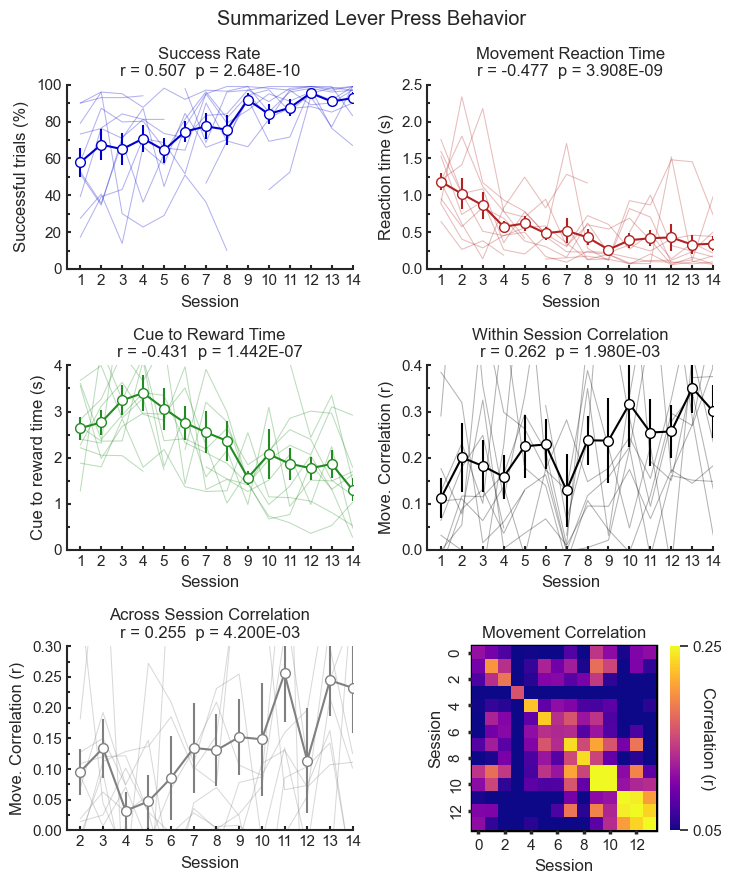

In [149]:
figure_path = r'C:\Users\Jake\Desktop\Figures'

# Specify if you want to save grouped figures
group_fig_save = False
gfp_group_fig_path = os.path.join(figure_path, "grouped_data", gfp_experiment_directory, gfp_group_directory)
if not os.path.isdir(gfp_group_fig_path):
    os.makedirs(gfp_group_fig_path)

# Plot the grouped data
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", 
          "within": "black", "across":"grey", "cmap": "plasma"}
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,4), 
         "within": (0,0.4), "across": (0,0.3), "cmap": (0.05, 0.25)}
gfp_grouped_data.plot_data(figsize=(7.5,9), colors=colors, plot_ind=True, ylims=ylims, save=group_fig_save, save_path=gfp_group_fig_path)

### paAIP2 data only

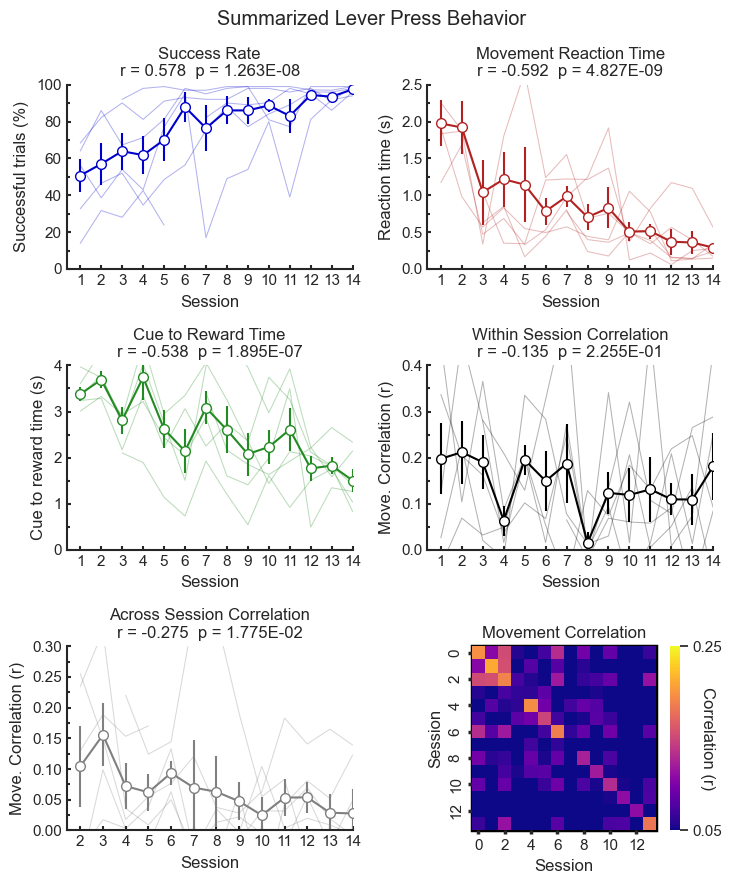

In [142]:
figure_path = r'C:\Users\Jake\Desktop\Figures'

# Specify if you want to save grouped figures
group_fig_save = False
pa_group_fig_path = os.path.join(figure_path, "grouped_data", pa_experiment_directory, pa_group_directory)
if not os.path.isdir(pa_group_fig_path):
    os.makedirs(pa_group_fig_path)

# Plot the grouped data
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", 
          "within": "black", "across":"grey", "cmap": "plasma"}
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,4), 
         "within": (0,0.4), "across": (0,0.3), "cmap": (0.05, 0.25)}
pa_grouped_data.plot_data(figsize=(7.5,9), colors=colors, plot_ind=True, ylims=ylims, save=group_fig_save, save_path=pa_group_fig_path)

## EGFP vs paAIP2

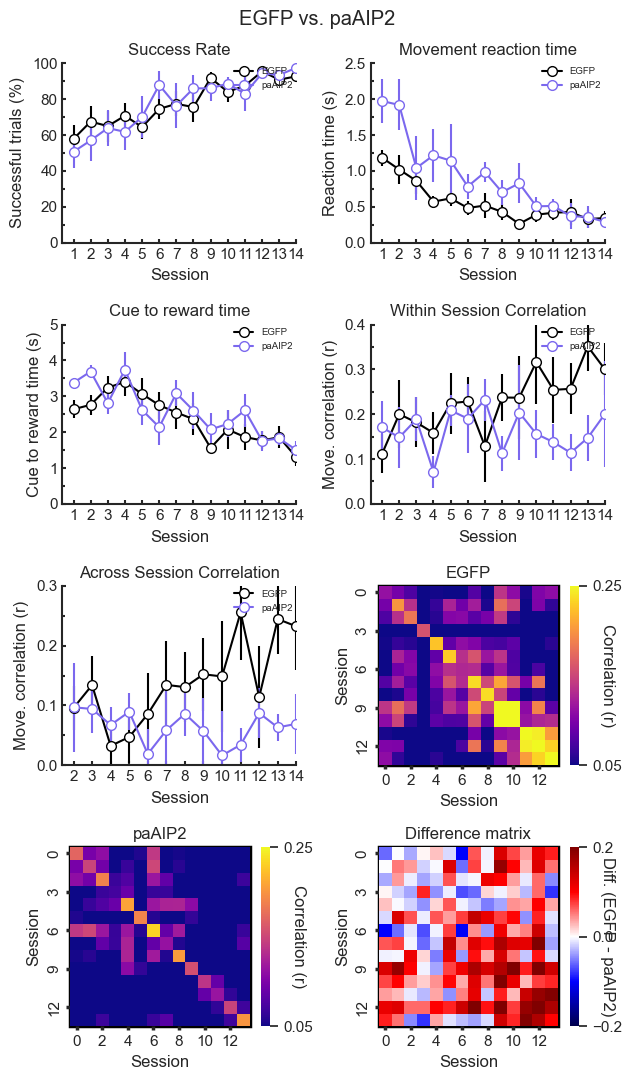

In [164]:
group_fig_path = r"C:\Users\Jake\Desktop\Figures\grouped_data\paAIP2_Behavior"
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,5), 
         "within": (0,0.4), "across": (0,0.3), "cmap": (0.05, 0.25)}
bplot.plot_multi_group_lever_behavior(
    data_dict={"EGFP": gfp_grouped_data, "paAIP2": pa_grouped_data},
    figsize=(6.5, 11),
    main_title="EGFP vs. paAIP2",
    colors=["black", "mediumslateblue"],
    ylims=ylims,
    save=True,
    save_path=group_fig_path,
)

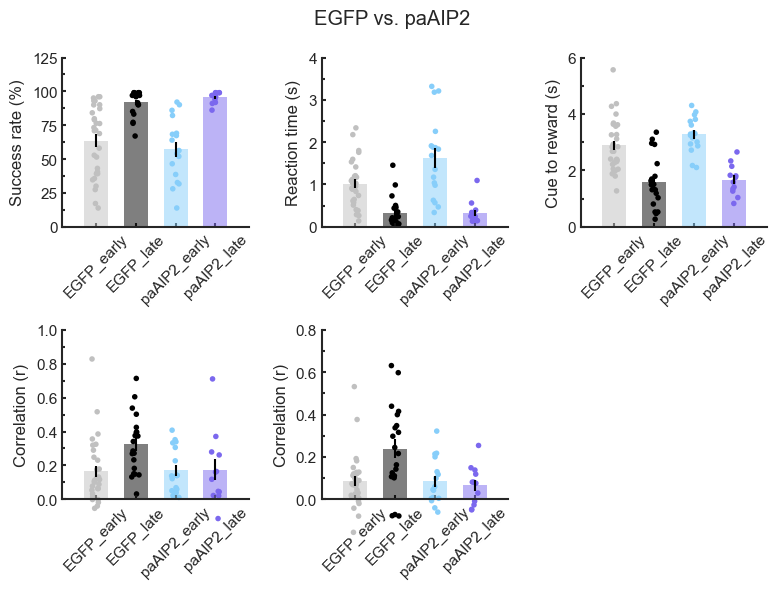

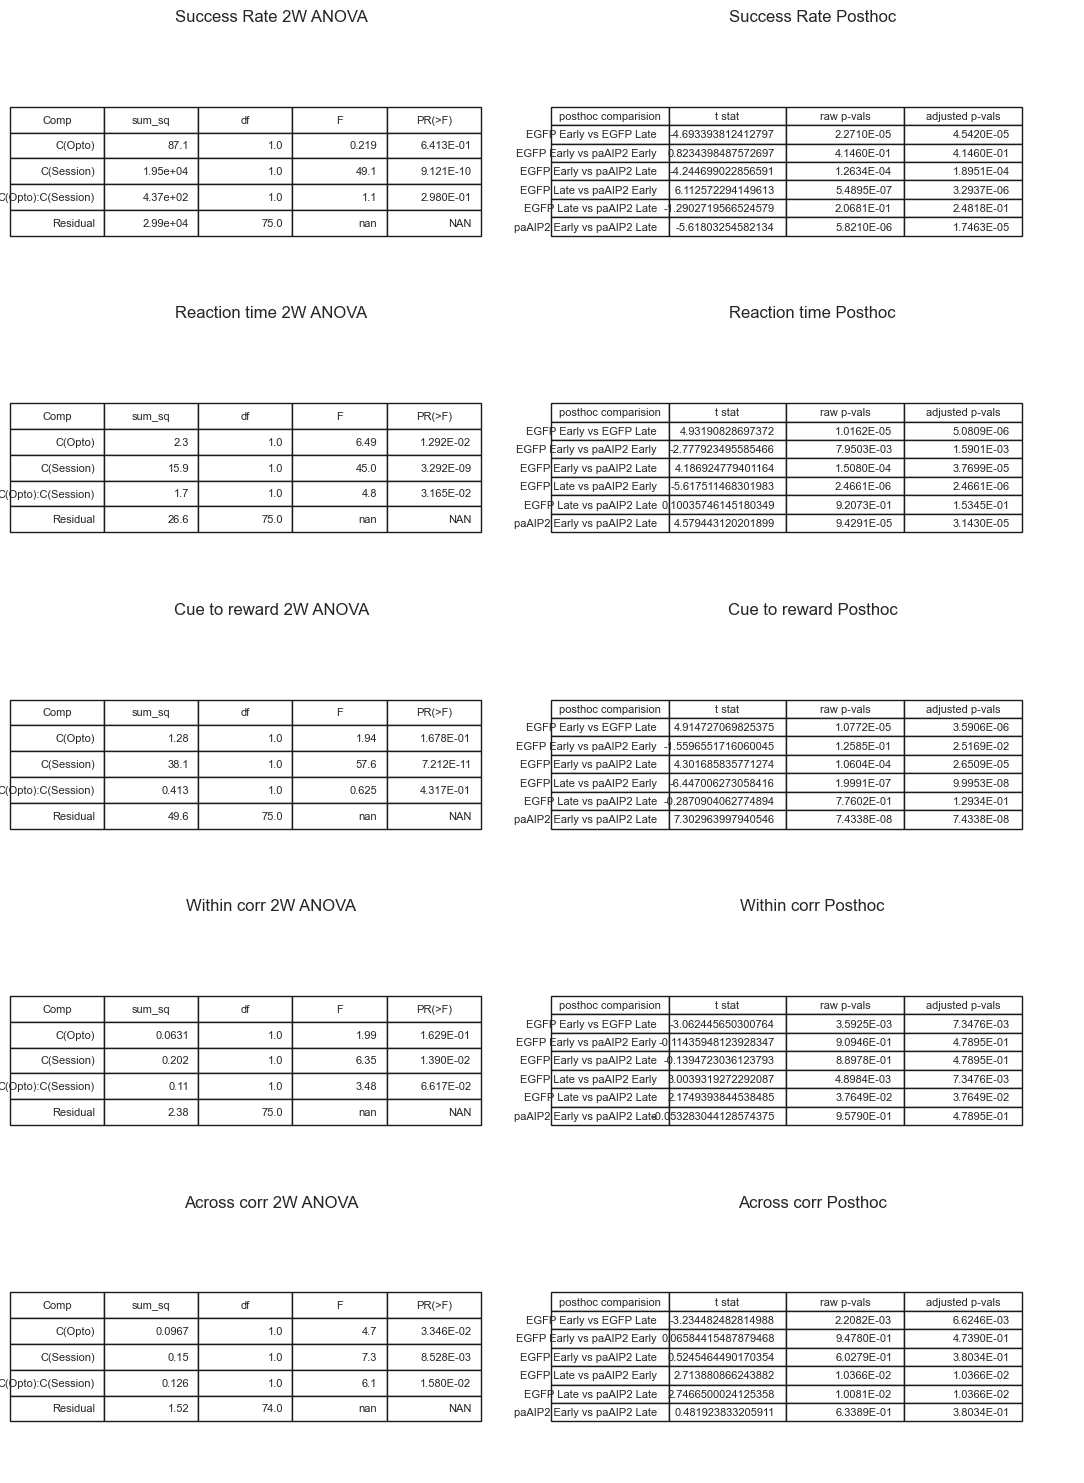

In [165]:
bplot.plot_multi_group_bar_plots(
    data_dict={"EGFP": gfp_grouped_data, "paAIP2": pa_grouped_data},
    figsize=(8, 6),
    main_title="EGFP vs. paAIP2",
    colors=["silver", "black", "lightskyblue", "mediumslateblue"],
    display_stats=True,
    test_method="fdr_tsbh",
    save=False,
    save_path=group_fig_path,
)

In [ ]:
gfp_grouped_data.ind_success_rate[-3:,:].shape

In [ ]:
a = np.array([1,1,1])

np.array([a, a])

In [ ]:
np.vstack([a, a])

In [ ]:
np.nextafter(0,1)